#### Fantasy Basketball 2020 Draft Guide Pt. 2

## Data Cleaning

In [19]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [20]:
#import Fantasy BBall Top 50% dataframe
df = pd.read_csv('Fantasy_Bball_Top_50%.csv')

In [21]:
df.head()

,Unnamed: 0,Player,Pos,Age,G,MP,FG,FGA,FG%,3P,FT,FTA,FT%,REB,AST,STL,BLK,TOV,PTS,DD,TD,DD_per,TD_per
0,0,Aaron Gordon,PF,24,62,32.50,5.40,12.40,0.44,1.20,2.40,3.60,0.67,7.70,3.70,0.80,0.60,1.60,14.40,20,1,0.32,0.02
1,1,Aaron Holiday,PG,23,66,24.50,3.50,8.50,0.41,1.30,1.10,1.30,0.85,2.40,3.40,0.80,0.20,1.30,9.50,3,0,0.05,0.00
2,5,Al Horford,C,33,67,30.20,4.80,10.60,0.45,1.50,0.90,1.20,0.76,6.80,4.00,0.80,0.90,1.20,11.90,6,0,0.09,0.00
3,7,Alec Burks,SF,28,66,26.60,4.90,11.60,0.42,1.80,3.60,4.00,0.89,4.30,2.90,0.90,0.30,1.40,15.00,1,0,0.02,0.00
4,10,Alex Len,C,26,55,17.60,3.20,5.80,0.56,0.30,1.20,1.90,0.65,5.80,0.90,0.40,0.90,1.00,8.00,8,0,0.15,0.00


In [22]:
pd.options.display.float_format = "{:,.2f}".format

In [23]:
del df['Unnamed: 0']

In [24]:
#Manually update the position for players that I think were miscategorized
df.loc[df['Player'] == 'LeBron James', 'Pos'] = 'SF'
df.loc[df['Player'] == 'LaMarcus Aldridge', 'Pos'] = 'PF'
df.loc[df['Player'] == 'Christian Wood', 'Pos'] = 'C'
df.loc[df['Player'] == 'DeMar DeRozan', 'Pos'] = 'SG'
df.loc[df['Player'] == 'Dennis Schröder', 'Pos'] = 'PG'
df.loc[df['Player'] == 'Evan Fournier', 'Pos'] = 'SG'
df.loc[df['Player'] == 'Jrue Holiday', 'Pos'] = 'PG'
df.loc[df['Player'] == 'Michael Carter-Williams', 'Pos'] = 'PG'
df.loc[df['Player'] == 'Paul George', 'Pos'] = 'SF'
df.loc[df['Player'] == 'Tobias Harris', 'Pos'] = 'SF'
df.loc[df['Player'] == 'Tristan Thompson', 'Pos'] = 'C'


## EDA and Feature Engineering

### FG%

In [25]:
df['FG%'].describe()

count   263.00
mean      0.47
std       0.06
min       0.35
25%       0.43
50%       0.45
75%       0.49
max       0.74
Name: FG%, dtype: float64

In [26]:
df['FG%'].groupby(df['Pos']).describe()

,count,mean,std,min,25%,50%,75%,max
Pos,,,,,,,,
C,48.00,0.54,0.08,0.40,0.47,0.53,0.60,0.74
PF,53.00,0.47,0.05,0.35,0.44,0.46,0.48,0.62
PG,55.00,0.44,0.04,0.38,0.42,0.44,0.46,0.58
SF,49.00,0.46,0.05,0.35,0.44,0.45,0.49,0.60
SG,58.00,0.44,0.03,0.38,0.42,0.44,0.46,0.53


In [27]:
#Create FG% tier overall feature
# create a list of our conditions
conditions = [
    (df['FG%'] >= .49),
    (df['FG%'] < .49) & (df['FG%'] >=.45),
    (df['FG%'] < .45) & (df['FG%'] >=.43),
    (df['FG%'] < .43)
]

# create a list of the values we want to assign for each condition
values = [3, 2, 1, 0]

# create a new column and use np.select to assign values to it using our lists as arguments
df['FG_Tier'] = np.select(conditions, values)


In [28]:
#Create FG% tier by position feature
# create a list of our conditions
conditions = [
    (df['Pos'] == 'C') & (df['FG%'] >= .60),
    (df['Pos'] == 'C') & (df['FG%'] < .60) & (df['FG%'] >= .53),
    (df['Pos'] == 'C') & (df['FG%'] < .53) & (df['FG%'] >= .47),
    (df['Pos'] == 'C') & (df['FG%'] < .47),
    (df['Pos'] == 'PF') & (df['FG%'] >= .48),
    (df['Pos'] == 'PF') & (df['FG%'] < .48) & (df['FG%'] >= .46),
    (df['Pos'] == 'PF') & (df['FG%'] < .46) & (df['FG%'] >= .44),
    (df['Pos'] == 'PF') & (df['FG%'] < .44),
    (df['Pos'] == 'SF') & (df['FG%'] >= .49),
    (df['Pos'] == 'SF') & (df['FG%'] < .49) & (df['FG%'] >= .45),
    (df['Pos'] == 'SF') & (df['FG%'] < .45) & (df['FG%'] >= .44),
    (df['Pos'] == 'SF') & (df['FG%'] < .44),
    (df['Pos'] == 'SG') & (df['FG%'] >= .46),
    (df['Pos'] == 'SG') & (df['FG%'] < .46) & (df['FG%'] >= .44),
    (df['Pos'] == 'SG') & (df['FG%'] < .44) & (df['FG%'] >= .42),
    (df['Pos'] == 'SG') & (df['FG%'] < .42),
    (df['Pos'] == 'PG') & (df['FG%'] >= .46),
    (df['Pos'] == 'PG') & (df['FG%'] < .46) & (df['FG%'] >= .44),
    (df['Pos'] == 'PG') & (df['FG%'] < .44) & (df['FG%'] >= .42),
    (df['Pos'] == 'PG') & (df['FG%'] < .42)
]
    
     

# create a list of the values we want to assign for each condition
values = [3, 2, 1, 0, 3, 2, 1, 0, 3, 2, 1, 0, 3, 2, 1, 0, 3, 2, 1, 0]

# create a new column and use np.select to assign values to it using our lists as arguments
df['FG_Pos_Tier'] = np.select(conditions, values)

# display updated DataFrame
df.head()

,Player,Pos,Age,G,MP,FG,FGA,FG%,3P,FT,FTA,FT%,REB,AST,STL,BLK,TOV,PTS,DD,TD,DD_per,TD_per,FG_Tier,FG_Pos_Tier
0,Aaron Gordon,PF,24,62,32.50,5.40,12.40,0.44,1.20,2.40,3.60,0.67,7.70,3.70,0.80,0.60,1.60,14.40,20,1,0.32,0.02,1,0
1,Aaron Holiday,PG,23,66,24.50,3.50,8.50,0.41,1.30,1.10,1.30,0.85,2.40,3.40,0.80,0.20,1.30,9.50,3,0,0.05,0.00,0,0
2,Al Horford,C,33,67,30.20,4.80,10.60,0.45,1.50,0.90,1.20,0.76,6.80,4.00,0.80,0.90,1.20,11.90,6,0,0.09,0.00,2,0
3,Alec Burks,SF,28,66,26.60,4.90,11.60,0.42,1.80,3.60,4.00,0.89,4.30,2.90,0.90,0.30,1.40,15.00,1,0,0.02,0.00,0,0
4,Alex Len,C,26,55,17.60,3.20,5.80,0.56,0.30,1.20,1.90,0.65,5.80,0.90,0.40,0.90,1.00,8.00,8,0,0.15,0.00,3,2


### 3PM

In [29]:
df['3P'].describe()

count   263.00
mean      1.41
std       0.90
min       0.00
25%       0.80
50%       1.30
75%       2.00
max       4.40
Name: 3P, dtype: float64

In [30]:
df['3P'].groupby(df['Pos']).describe()

,count,mean,std,min,25%,50%,75%,max
Pos,,,,,,,,
C,48.00,0.68,0.77,0.00,0.00,0.40,1.10,3.30
PF,53.00,1.35,0.75,0.00,0.90,1.30,1.60,3.70
PG,55.00,1.52,0.96,0.00,0.80,1.30,2.00,4.10
SF,49.00,1.55,0.69,0.40,1.00,1.60,1.90,3.30
SG,58.00,1.85,0.89,0.10,1.22,1.80,2.30,4.40


In [31]:
#Create 3P tier overall feature
# create a list of our conditions
conditions = [
    (df['3P'] >= 2.0),
    (df['3P'] < 2.0) & (df['3P'] >=1.3),
    (df['3P'] < 1.3) & (df['3P'] >=.8),
    (df['3P'] < .8)
]

# create a list of the values we want to assign for each condition
values = [3, 2, 1, 0]

# create a new column and use np.select to assign values to it using our lists as arguments
df['3P_Tier'] = np.select(conditions, values)


In [32]:
#Create 3P tier by position feature
# create a list of our conditions
conditions = [
    (df['Pos'] == 'C') &  (df['3P'] >= 1.1),
    (df['Pos'] == 'C') &  (df['3P'] < 1.1) & (df['3P'] >= .4),
    (df['Pos'] == 'C') &  (df['3P'] < .4) & (df['3P'] > .00),
    (df['Pos'] == 'C') &  (df['3P'] == .00 ),
    (df['Pos'] == 'PF') & (df['3P'] >= 1.6),
    (df['Pos'] == 'PF') & (df['3P'] < 1.6) & (df['3P'] >= 1.3),
    (df['Pos'] == 'PF') & (df['3P'] < 1.3) & (df['3P'] >= .9),
    (df['Pos'] == 'PF') & (df['3P'] < .9),
    (df['Pos'] == 'SF') & (df['3P'] >= 1.9),
    (df['Pos'] == 'SF') & (df['3P'] < 1.9) & (df['3P'] >= 1.6),
    (df['Pos'] == 'SF') & (df['3P'] < 1.6) & (df['3P'] >= 1.0),
    (df['Pos'] == 'SF') & (df['3P'] < 1.0),
    (df['Pos'] == 'SG') & (df['3P'] >= 2.3),
    (df['Pos'] == 'SG') & (df['3P'] < 2.3) & (df['3P'] >= 1.8),
    (df['Pos'] == 'SG') & (df['3P'] < 1.8) & (df['3P'] >= 1.22),
    (df['Pos'] == 'SG') & (df['3P'] < 1.22),
    (df['Pos'] == 'PG') & (df['3P'] >= 2.0),
    (df['Pos'] == 'PG') & (df['3P'] < 2.0) & (df['3P'] >= 1.3),
    (df['Pos'] == 'PG') & (df['3P'] < 1.3) & (df['3P'] >= .8),
    (df['Pos'] == 'PG') & (df['3P'] < .8)
]
    
     

# create a list of the values we want to assign for each condition
values = [3, 2, 1, 0, 3, 2, 1, 0, 3, 2, 1, 0, 3, 2, 1, 0, 3, 2, 1, 0]

# create a new column and use np.select to assign values to it using our lists as arguments
df['3P_Pos_Tier'] = np.select(conditions, values)

# display updated DataFrame
df.head()

,Player,Pos,Age,G,MP,FG,FGA,FG%,3P,FT,FTA,FT%,REB,AST,STL,BLK,TOV,PTS,DD,TD,DD_per,TD_per,FG_Tier,FG_Pos_Tier,3P_Tier,3P_Pos_Tier
0,Aaron Gordon,PF,24,62,32.50,5.40,12.40,0.44,1.20,2.40,3.60,0.67,7.70,3.70,0.80,0.60,1.60,14.40,20,1,0.32,0.02,1,0,1,1
1,Aaron Holiday,PG,23,66,24.50,3.50,8.50,0.41,1.30,1.10,1.30,0.85,2.40,3.40,0.80,0.20,1.30,9.50,3,0,0.05,0.00,0,0,2,2
2,Al Horford,C,33,67,30.20,4.80,10.60,0.45,1.50,0.90,1.20,0.76,6.80,4.00,0.80,0.90,1.20,11.90,6,0,0.09,0.00,2,0,2,3
3,Alec Burks,SF,28,66,26.60,4.90,11.60,0.42,1.80,3.60,4.00,0.89,4.30,2.90,0.90,0.30,1.40,15.00,1,0,0.02,0.00,0,0,2,2
4,Alex Len,C,26,55,17.60,3.20,5.80,0.56,0.30,1.20,1.90,0.65,5.80,0.90,0.40,0.90,1.00,8.00,8,0,0.15,0.00,3,2,0,1


### FT%

In [33]:
df['FT%'].describe()

count   263.00
mean      0.78
std       0.09
min       0.46
25%       0.74
50%       0.80
75%       0.84
max       1.00
Name: FT%, dtype: float64

In [34]:
df['FT%'].groupby(df['Pos']).describe()

,count,mean,std,min,25%,50%,75%,max
Pos,,,,,,,,
C,48.00,0.72,0.09,0.53,0.66,0.74,0.79,0.89
PF,53.00,0.77,0.07,0.58,0.73,0.78,0.82,0.89
PG,55.00,0.81,0.08,0.57,0.77,0.83,0.86,1.00
SF,49.00,0.78,0.09,0.50,0.74,0.79,0.83,1.00
SG,58.00,0.80,0.09,0.46,0.78,0.82,0.86,0.93


In [35]:
#Create FT% tier overall feature
# create a list of our conditions
conditions = [
    (df['FT%'] >= .84),
    (df['FT%'] < .84) & (df['FT%'] >=.80),
    (df['FT%'] < .80) & (df['FT%'] >=.74),
    (df['FT%'] < .74)
]

# create a list of the values we want to assign for each condition
values = [3, 2, 1, 0]

# create a new column and use np.select to assign values to it using our lists as arguments
df['FT_Tier'] = np.select(conditions, values)


In [36]:
#Create FT% tier by position feature
# create a list of our conditions
conditions = [
    (df['Pos'] == 'C') &  (df['FT%'] >= .79),
    (df['Pos'] == 'C') &  (df['FT%'] < .79) & (df['FT%'] >= .74),
    (df['Pos'] == 'C') &  (df['FT%'] < .74) & (df['FT%'] >= .66),
    (df['Pos'] == 'C') &  (df['FT%'] < .66),
    (df['Pos'] == 'PF') & (df['FT%'] >= .82),
    (df['Pos'] == 'PF') & (df['FT%'] < .82) & (df['FT%'] >= .78),
    (df['Pos'] == 'PF') & (df['FT%'] < .78) & (df['FT%'] >= .73),
    (df['Pos'] == 'PF') & (df['FT%'] < .73),
    (df['Pos'] == 'SF') & (df['FT%'] >= .83),
    (df['Pos'] == 'SF') & (df['FT%'] < .83) & (df['FT%'] >= .79),
    (df['Pos'] == 'SF') & (df['FT%'] < .79) & (df['FT%'] >= .74),
    (df['Pos'] == 'SF') & (df['FT%'] < .74),
    (df['Pos'] == 'SG') & (df['FT%'] >= .86),
    (df['Pos'] == 'SG') & (df['FT%'] < .86) & (df['FT%'] >= .82),
    (df['Pos'] == 'SG') & (df['FT%'] < .82) & (df['FT%'] >= .78),
    (df['Pos'] == 'SG') & (df['FT%'] < .78),
    (df['Pos'] == 'PG') & (df['FT%'] >= .86),
    (df['Pos'] == 'PG') & (df['FT%'] < .86) & (df['FT%'] >= .83),
    (df['Pos'] == 'PG') & (df['FT%'] < .83) & (df['FT%'] >= .77),
    (df['Pos'] == 'PG') & (df['FT%'] < .77)
]
    
     

# create a list of the values we want to assign for each condition
values = [3, 2, 1, 0, 3, 2, 1, 0, 3, 2, 1, 0, 3, 2, 1, 0, 3, 2, 1, 0]

# create a new column and use np.select to assign values to it using our lists as arguments
df['FT_Pos_Tier'] = np.select(conditions, values)

# display updated DataFrame
df.head()

,Player,Pos,Age,G,MP,FG,FGA,FG%,3P,FT,FTA,FT%,REB,AST,STL,BLK,TOV,PTS,DD,TD,DD_per,TD_per,FG_Tier,FG_Pos_Tier,3P_Tier,3P_Pos_Tier,FT_Tier,FT_Pos_Tier
0,Aaron Gordon,PF,24,62,32.50,5.40,12.40,0.44,1.20,2.40,3.60,0.67,7.70,3.70,0.80,0.60,1.60,14.40,20,1,0.32,0.02,1,0,1,1,0,0
1,Aaron Holiday,PG,23,66,24.50,3.50,8.50,0.41,1.30,1.10,1.30,0.85,2.40,3.40,0.80,0.20,1.30,9.50,3,0,0.05,0.00,0,0,2,2,3,2
2,Al Horford,C,33,67,30.20,4.80,10.60,0.45,1.50,0.90,1.20,0.76,6.80,4.00,0.80,0.90,1.20,11.90,6,0,0.09,0.00,2,0,2,3,1,2
3,Alec Burks,SF,28,66,26.60,4.90,11.60,0.42,1.80,3.60,4.00,0.89,4.30,2.90,0.90,0.30,1.40,15.00,1,0,0.02,0.00,0,0,2,2,3,3
4,Alex Len,C,26,55,17.60,3.20,5.80,0.56,0.30,1.20,1.90,0.65,5.80,0.90,0.40,0.90,1.00,8.00,8,0,0.15,0.00,3,2,0,1,0,0


### REB

In [37]:
df['REB'].describe()

count   263.00
mean      5.11
std       2.50
min       1.30
25%       3.40
50%       4.60
75%       6.25
max      15.20
Name: REB, dtype: float64

In [38]:
df['REB'].groupby(df['Pos']).describe()

,count,mean,std,min,25%,50%,75%,max
Pos,,,,,,,,
C,48.00,7.92,2.87,4.10,5.68,7.15,9.85,15.20
PF,53.00,6.17,2.19,2.80,4.80,6.00,6.60,13.60
PG,55.00,3.82,1.56,1.50,2.70,3.60,4.70,9.40
SF,49.00,4.44,1.51,1.60,3.40,4.30,5.60,7.80
SG,58.00,3.62,1.18,1.30,2.75,3.50,4.20,6.60


In [39]:
#Create REB tier overall feature
# create a list of our conditions
conditions = [
    (df['REB'] >= 6.25),
    (df['REB'] < 6.25) & (df['REB'] >= 4.60),
    (df['REB'] < 4.60) & (df['REB'] >= 3.40),
    (df['REB'] < 3.40)
]

# create a list of the values we want to assign for each condition
values = [3, 2, 1, 0]

# create a new column and use np.select to assign values to it using our lists as arguments
df['REB_Tier'] = np.select(conditions, values)


In [40]:
#Create REB tier by position feature
# create a list of our conditions
conditions = [
    (df['Pos'] == 'C') &  (df['REB'] >= 9.85),
    (df['Pos'] == 'C') &  (df['REB'] < 9.85) & (df['REB'] >= 7.15),
    (df['Pos'] == 'C') &  (df['REB'] < 7.15) & (df['REB'] >= 5.68),
    (df['Pos'] == 'C') &  (df['REB'] < 5.68),
    (df['Pos'] == 'PF') & (df['REB'] >= 6.60),
    (df['Pos'] == 'PF') & (df['REB'] < 6.60) & (df['REB'] >= 6.00),
    (df['Pos'] == 'PF') & (df['REB'] < 6.00) & (df['REB'] >= 4.80),
    (df['Pos'] == 'PF') & (df['REB'] < 4.80),
    (df['Pos'] == 'SF') & (df['REB'] >= 5.60),
    (df['Pos'] == 'SF') & (df['REB'] < 5.60) & (df['REB'] >= 4.30),
    (df['Pos'] == 'SF') & (df['REB'] < 4.30) & (df['REB'] >= 3.40),
    (df['Pos'] == 'SF') & (df['REB'] < 3.40),
    (df['Pos'] == 'SG') & (df['REB'] >= 4.20),
    (df['Pos'] == 'SG') & (df['REB'] < 4.20) & (df['REB'] >= 3.50),
    (df['Pos'] == 'SG') & (df['REB'] < 3.50) & (df['REB'] >= 2.75),
    (df['Pos'] == 'SG') & (df['REB'] < 2.75),
    (df['Pos'] == 'PG') & (df['REB'] >= 4.70),
    (df['Pos'] == 'PG') & (df['REB'] < 4.70) & (df['REB'] >= 3.60),
    (df['Pos'] == 'PG') & (df['REB'] < 3.60) & (df['REB'] >= 2.70),
    (df['Pos'] == 'PG') & (df['REB'] < 2.70)
]
    
     

# create a list of the values we want to assign for each condition
values = [3, 2, 1, 0, 3, 2, 1, 0, 3, 2, 1, 0, 3, 2, 1, 0, 3, 2, 1, 0]

# create a new column and use np.select to assign values to it using our lists as arguments
df['REB_Pos_Tier'] = np.select(conditions, values)

# display updated DataFrame
df.head()

,Player,Pos,Age,G,MP,FG,FGA,FG%,3P,FT,FTA,FT%,REB,AST,STL,BLK,TOV,PTS,DD,TD,DD_per,TD_per,FG_Tier,FG_Pos_Tier,3P_Tier,3P_Pos_Tier,FT_Tier,FT_Pos_Tier,REB_Tier,REB_Pos_Tier
0,Aaron Gordon,PF,24,62,32.50,5.40,12.40,0.44,1.20,2.40,3.60,0.67,7.70,3.70,0.80,0.60,1.60,14.40,20,1,0.32,0.02,1,0,1,1,0,0,3,3
1,Aaron Holiday,PG,23,66,24.50,3.50,8.50,0.41,1.30,1.10,1.30,0.85,2.40,3.40,0.80,0.20,1.30,9.50,3,0,0.05,0.00,0,0,2,2,3,2,0,0
2,Al Horford,C,33,67,30.20,4.80,10.60,0.45,1.50,0.90,1.20,0.76,6.80,4.00,0.80,0.90,1.20,11.90,6,0,0.09,0.00,2,0,2,3,1,2,3,1
3,Alec Burks,SF,28,66,26.60,4.90,11.60,0.42,1.80,3.60,4.00,0.89,4.30,2.90,0.90,0.30,1.40,15.00,1,0,0.02,0.00,0,0,2,2,3,3,1,2
4,Alex Len,C,26,55,17.60,3.20,5.80,0.56,0.30,1.20,1.90,0.65,5.80,0.90,0.40,0.90,1.00,8.00,8,0,0.15,0.00,3,2,0,1,0,0,2,1


### AST

In [41]:
df['AST'].describe()

count   263.00
mean      2.89
std       1.93
min       0.40
25%       1.50
50%       2.10
75%       3.90
max      10.20
Name: AST, dtype: float64

In [42]:
df['AST'].groupby(df['Pos']).describe()

,count,mean,std,min,25%,50%,75%,max
Pos,,,,,,,,
C,48.00,1.83,1.19,0.40,1.20,1.50,1.90,7.00
PF,53.00,2.25,1.29,0.80,1.40,1.80,2.80,6.20
PG,55.00,5.03,1.98,1.40,3.35,4.80,6.75,9.30
SF,49.00,2.26,1.62,0.80,1.40,1.80,2.50,10.20
SG,58.00,2.86,1.55,0.50,1.72,2.25,3.88,7.50


In [43]:
#Create AST tier overall feature
# create a list of our conditions
conditions = [
    (df['AST'] >= 3.9),
    (df['AST'] < 3.9) & (df['AST'] >= 2.1),
    (df['AST'] < 2.1) & (df['AST'] >=1.5),
    (df['AST'] < 1.5)
]

# create a list of the values we want to assign for each condition
values = [3, 2, 1, 0]

# create a new column and use np.select to assign values to it using our lists as arguments
df['AST_Tier'] = np.select(conditions, values)


In [44]:
#Create AST tier by position feature
# create a list of our conditions
conditions = [
    (df['Pos'] == 'C') &  (df['AST'] >= 1.9),
    (df['Pos'] == 'C') &  (df['AST'] < 1.9) & (df['AST'] >= 1.5),
    (df['Pos'] == 'C') &  (df['AST'] < 1.5) & (df['AST'] >= 1.2),
    (df['Pos'] == 'C') &  (df['AST'] < 1.2),
    (df['Pos'] == 'PF') & (df['AST'] >= 2.8),
    (df['Pos'] == 'PF') & (df['AST'] < 2.8) & (df['AST'] >= 1.8),
    (df['Pos'] == 'PF') & (df['AST'] < 1.8) & (df['AST'] >= 1.4),
    (df['Pos'] == 'PF') & (df['AST'] < 1.4),
    (df['Pos'] == 'SF') & (df['AST'] >= 2.5),
    (df['Pos'] == 'SF') & (df['AST'] < 2.5) & (df['AST'] >= 1.8),
    (df['Pos'] == 'SF') & (df['AST'] < 1.8) & (df['AST'] >= 1.4),
    (df['Pos'] == 'SF') & (df['AST'] < 1.4),
    (df['Pos'] == 'SG') & (df['AST'] >= 3.88),
    (df['Pos'] == 'SG') & (df['AST'] < 3.88) & (df['AST'] >= 2.25),
    (df['Pos'] == 'SG') & (df['AST'] < 2.25) & (df['AST'] >= 1.72),
    (df['Pos'] == 'SG') & (df['AST'] < 1.72),
    (df['Pos'] == 'PG') & (df['AST'] >= 6.75),
    (df['Pos'] == 'PG') & (df['AST'] < 6.75) & (df['AST'] >= 4.80),
    (df['Pos'] == 'PG') & (df['AST'] < 4.80) & (df['AST'] >= 3.35),
    (df['Pos'] == 'PG') & (df['AST'] < 3.35)
]
    
     

# create a list of the values we want to assign for each condition
values = [3, 2, 1, 0, 3, 2, 1, 0, 3, 2, 1, 0, 3, 2, 1, 0, 3, 2, 1, 0]

# create a new column and use np.select to assign values to it using our lists as arguments
df['AST_Pos_Tier'] = np.select(conditions, values)

# display updated DataFrame
df.head()

,Player,Pos,Age,G,MP,FG,FGA,FG%,3P,FT,FTA,FT%,REB,AST,STL,BLK,TOV,PTS,DD,TD,DD_per,TD_per,FG_Tier,FG_Pos_Tier,3P_Tier,3P_Pos_Tier,FT_Tier,FT_Pos_Tier,REB_Tier,REB_Pos_Tier,AST_Tier,AST_Pos_Tier
0,Aaron Gordon,PF,24,62,32.50,5.40,12.40,0.44,1.20,2.40,3.60,0.67,7.70,3.70,0.80,0.60,1.60,14.40,20,1,0.32,0.02,1,0,1,1,0,0,3,3,2,3
1,Aaron Holiday,PG,23,66,24.50,3.50,8.50,0.41,1.30,1.10,1.30,0.85,2.40,3.40,0.80,0.20,1.30,9.50,3,0,0.05,0.00,0,0,2,2,3,2,0,0,2,1
2,Al Horford,C,33,67,30.20,4.80,10.60,0.45,1.50,0.90,1.20,0.76,6.80,4.00,0.80,0.90,1.20,11.90,6,0,0.09,0.00,2,0,2,3,1,2,3,1,3,3
3,Alec Burks,SF,28,66,26.60,4.90,11.60,0.42,1.80,3.60,4.00,0.89,4.30,2.90,0.90,0.30,1.40,15.00,1,0,0.02,0.00,0,0,2,2,3,3,1,2,2,3
4,Alex Len,C,26,55,17.60,3.20,5.80,0.56,0.30,1.20,1.90,0.65,5.80,0.90,0.40,0.90,1.00,8.00,8,0,0.15,0.00,3,2,0,1,0,0,2,1,0,0


### STL

In [45]:
df['STL'].describe()

count   263.00
mean      0.88
std       0.35
min       0.20
25%       0.60
50%       0.80
75%       1.10
max       2.10
Name: STL, dtype: float64

In [46]:
df['STL'].groupby(df['Pos']).describe()

,count,mean,std,min,25%,50%,75%,max
Pos,,,,,,,,
C,48.00,0.69,0.29,0.20,0.50,0.70,0.80,1.90
PF,53.00,0.80,0.32,0.30,0.60,0.80,0.90,1.60
PG,55.00,1.05,0.37,0.40,0.80,1.00,1.25,2.10
SF,49.00,0.92,0.32,0.40,0.70,0.80,1.10,1.80
SG,58.00,0.90,0.36,0.30,0.60,0.90,1.10,1.90


In [47]:
#Create STL tier overall feature
# create a list of our conditions
conditions = [
    (df['STL'] >= 1.1),
    (df['STL'] < 1.1) & (df['STL'] >= .8),
    (df['STL'] < .8) & (df['STL'] >=.6),
    (df['STL'] < .6)
]

# create a list of the values we want to assign for each condition
values = [3, 2, 1, 0]

# create a new column and use np.select to assign values to it using our lists as arguments
df['STL_Tier'] = np.select(conditions, values)


In [48]:
#Create STL tier by position feature
# create a list of our conditions
conditions = [
    (df['Pos'] == 'C') &  (df['STL'] >= .8),
    (df['Pos'] == 'C') &  (df['STL'] < .8) & (df['STL'] >= .7),
    (df['Pos'] == 'C') &  (df['STL'] < .7) & (df['STL'] >= .5),
    (df['Pos'] == 'C') &  (df['STL'] < .5),
    (df['Pos'] == 'PF') & (df['STL'] >= .9),
    (df['Pos'] == 'PF') & (df['STL'] < .9) & (df['STL'] >= .8),
    (df['Pos'] == 'PF') & (df['STL'] < .8) & (df['STL'] >= .6),
    (df['Pos'] == 'PF') & (df['STL'] < .6),
    (df['Pos'] == 'SF') & (df['STL'] >= 1.1),
    (df['Pos'] == 'SF') & (df['STL'] < 1.1) & (df['STL'] >= .8),
    (df['Pos'] == 'SF') & (df['STL'] < .8) & (df['STL'] >= .7),
    (df['Pos'] == 'SF') & (df['STL'] < .7),
    (df['Pos'] == 'SG') & (df['STL'] >= 1.1),
    (df['Pos'] == 'SG') & (df['STL'] < 1.1) & (df['STL'] >= .9),
    (df['Pos'] == 'SG') & (df['STL'] < .9) & (df['STL'] >= .6),
    (df['Pos'] == 'SG') & (df['STL'] < .6),
    (df['Pos'] == 'PG') & (df['STL'] >= 1.25),
    (df['Pos'] == 'PG') & (df['STL'] < 1.25) & (df['STL'] >= 1.0),
    (df['Pos'] == 'PG') & (df['STL'] < 1.0) & (df['STL'] >= .8),
    (df['Pos'] == 'PG') & (df['STL'] < .8)
]
    
     

# create a list of the values we want to assign for each condition
values = [3, 2, 1, 0, 3, 2, 1, 0, 3, 2, 1, 0, 3, 2, 1, 0, 3, 2, 1, 0]

# create a new column and use np.select to assign values to it using our lists as arguments
df['STL_Pos_Tier'] = np.select(conditions, values)

# display updated DataFrame
df.head()

,Player,Pos,Age,G,MP,FG,FGA,FG%,3P,FT,FTA,FT%,REB,AST,STL,BLK,TOV,PTS,DD,TD,DD_per,TD_per,FG_Tier,FG_Pos_Tier,3P_Tier,3P_Pos_Tier,FT_Tier,FT_Pos_Tier,REB_Tier,REB_Pos_Tier,AST_Tier,AST_Pos_Tier,STL_Tier,STL_Pos_Tier
0,Aaron Gordon,PF,24,62,32.50,5.40,12.40,0.44,1.20,2.40,3.60,0.67,7.70,3.70,0.80,0.60,1.60,14.40,20,1,0.32,0.02,1,0,1,1,0,0,3,3,2,3,2,2
1,Aaron Holiday,PG,23,66,24.50,3.50,8.50,0.41,1.30,1.10,1.30,0.85,2.40,3.40,0.80,0.20,1.30,9.50,3,0,0.05,0.00,0,0,2,2,3,2,0,0,2,1,2,1
2,Al Horford,C,33,67,30.20,4.80,10.60,0.45,1.50,0.90,1.20,0.76,6.80,4.00,0.80,0.90,1.20,11.90,6,0,0.09,0.00,2,0,2,3,1,2,3,1,3,3,2,3
3,Alec Burks,SF,28,66,26.60,4.90,11.60,0.42,1.80,3.60,4.00,0.89,4.30,2.90,0.90,0.30,1.40,15.00,1,0,0.02,0.00,0,0,2,2,3,3,1,2,2,3,2,2
4,Alex Len,C,26,55,17.60,3.20,5.80,0.56,0.30,1.20,1.90,0.65,5.80,0.90,0.40,0.90,1.00,8.00,8,0,0.15,0.00,3,2,0,1,0,0,2,1,0,0,0,0


### BLK

In [49]:
df['BLK'].describe()

count   263.00
mean      0.55
std       0.46
min       0.00
25%       0.30
50%       0.40
75%       0.60
max       2.90
Name: BLK, dtype: float64

In [50]:
df['BLK'].groupby(df['Pos']).describe()

,count,mean,std,min,25%,50%,75%,max
Pos,,,,,,,,
C,48.00,1.13,0.57,0.30,0.80,0.90,1.35,2.90
PF,53.00,0.65,0.48,0.10,0.40,0.50,0.80,2.30
PG,55.00,0.29,0.16,0.00,0.20,0.30,0.40,0.80
SF,49.00,0.42,0.19,0.10,0.30,0.40,0.60,1.00
SG,58.00,0.32,0.18,0.00,0.20,0.30,0.40,0.90


In [51]:
#Create BLK tier overall feature
# create a list of our conditions
conditions = [
    (df['BLK'] >= .6),
    (df['BLK'] < .6) & (df['BLK'] >= .4),
    (df['BLK'] < .4) & (df['BLK'] >=.3),
    (df['BLK'] < .3)
]

# create a list of the values we want to assign for each condition
values = [3, 2, 1, 0]

# create a new column and use np.select to assign values to it using our lists as arguments
df['BLK_Tier'] = np.select(conditions, values)


In [52]:
#Create BLK tier by position feature
# create a list of our conditions
conditions = [
    (df['Pos'] == 'C') &  (df['BLK'] >= 1.35),
    (df['Pos'] == 'C') &  (df['BLK'] < 1.35) & (df['BLK'] >= .9),
    (df['Pos'] == 'C') &  (df['BLK'] < .9) & (df['BLK'] >= .8),
    (df['Pos'] == 'C') &  (df['BLK'] < .8),
    (df['Pos'] == 'PF') & (df['BLK'] >= .8),
    (df['Pos'] == 'PF') & (df['BLK'] < .8) & (df['BLK'] >= .5),
    (df['Pos'] == 'PF') & (df['BLK'] < .5) & (df['BLK'] >= .4),
    (df['Pos'] == 'PF') & (df['BLK'] < .4),
    (df['Pos'] == 'SF') & (df['BLK'] >= .6),
    (df['Pos'] == 'SF') & (df['BLK'] < .6) & (df['BLK'] >= .4),
    (df['Pos'] == 'SF') & (df['BLK'] < .4) & (df['BLK'] >= .3),
    (df['Pos'] == 'SF') & (df['BLK'] < .3),
    (df['Pos'] == 'SG') & (df['BLK'] >= .4),
    (df['Pos'] == 'SG') & (df['BLK'] < .4) & (df['BLK'] >= .3),
    (df['Pos'] == 'SG') & (df['BLK'] < .3) & (df['BLK'] >= .2),
    (df['Pos'] == 'SG') & (df['BLK'] < .2),
    (df['Pos'] == 'PG') & (df['BLK'] >= .4),
    (df['Pos'] == 'PG') & (df['BLK'] < .4) & (df['BLK'] >= .3),
    (df['Pos'] == 'PG') & (df['BLK'] < .3) & (df['BLK'] >= .2),
    (df['Pos'] == 'PG') & (df['BLK'] < .2)
]
    
     

# create a list of the values we want to assign for each condition
values = [3, 2, 1, 0, 3, 2, 1, 0, 3, 2, 1, 0, 3, 2, 1, 0, 3, 2, 1, 0]

# create a new column and use np.select to assign values to it using our lists as arguments
df['BLK_Pos_Tier'] = np.select(conditions, values)

# display updated DataFrame
df.head()

,Player,Pos,Age,G,MP,FG,FGA,FG%,3P,FT,FTA,FT%,REB,AST,STL,BLK,TOV,PTS,DD,TD,DD_per,TD_per,FG_Tier,FG_Pos_Tier,3P_Tier,3P_Pos_Tier,FT_Tier,FT_Pos_Tier,REB_Tier,REB_Pos_Tier,AST_Tier,AST_Pos_Tier,STL_Tier,STL_Pos_Tier,BLK_Tier,BLK_Pos_Tier
0,Aaron Gordon,PF,24,62,32.50,5.40,12.40,0.44,1.20,2.40,3.60,0.67,7.70,3.70,0.80,0.60,1.60,14.40,20,1,0.32,0.02,1,0,1,1,0,0,3,3,2,3,2,2,3,2
1,Aaron Holiday,PG,23,66,24.50,3.50,8.50,0.41,1.30,1.10,1.30,0.85,2.40,3.40,0.80,0.20,1.30,9.50,3,0,0.05,0.00,0,0,2,2,3,2,0,0,2,1,2,1,0,1
2,Al Horford,C,33,67,30.20,4.80,10.60,0.45,1.50,0.90,1.20,0.76,6.80,4.00,0.80,0.90,1.20,11.90,6,0,0.09,0.00,2,0,2,3,1,2,3,1,3,3,2,3,3,2
3,Alec Burks,SF,28,66,26.60,4.90,11.60,0.42,1.80,3.60,4.00,0.89,4.30,2.90,0.90,0.30,1.40,15.00,1,0,0.02,0.00,0,0,2,2,3,3,1,2,2,3,2,2,1,1
4,Alex Len,C,26,55,17.60,3.20,5.80,0.56,0.30,1.20,1.90,0.65,5.80,0.90,0.40,0.90,1.00,8.00,8,0,0.15,0.00,3,2,0,1,0,0,2,1,0,0,0,0,3,2


### TOV

In [53]:
df['TOV'].describe()

count   263.00
mean      1.64
std       0.82
min       0.30
25%       1.10
50%       1.40
75%       2.10
max       4.80
Name: TOV, dtype: float64

In [54]:
df['TOV'].groupby(df['Pos']).describe()

,count,mean,std,min,25%,50%,75%,max
Pos,,,,,,,,
C,48.00,1.47,0.66,0.50,1.10,1.30,1.70,3.60
PF,53.00,1.58,0.71,0.50,1.10,1.40,2.00,3.70
PG,55.00,2.15,0.97,0.60,1.35,2.10,2.75,4.80
SF,49.00,1.32,0.68,0.30,0.90,1.10,1.50,3.90
SG,58.00,1.64,0.81,0.40,1.02,1.40,1.98,4.50


In [55]:
#Create TOV tier overall feature
# create a list of our conditions
conditions = [
    (df['TOV'] <= 1.1),
    (df['TOV'] > 1.1) & (df['TOV'] <= 1.4),
    (df['TOV'] > 1.4) & (df['TOV'] <= 2.1),
    (df['TOV'] > 2.1)
]

# create a list of the values we want to assign for each condition
values = [3, 2, 1, 0]

# create a new column and use np.select to assign values to it using our lists as arguments
df['TOV_Tier'] = np.select(conditions, values)


In [56]:
#Create TOV tier by position feature
# create a list of our conditions
conditions = [
    (df['Pos'] == 'C') &  (df['TOV'] <= 1.1),
    (df['Pos'] == 'C') &  (df['TOV'] > 1.1) & (df['TOV'] <= 1.3),
    (df['Pos'] == 'C') &  (df['TOV'] > 1.3) & (df['TOV'] <= 1.7),
    (df['Pos'] == 'C') &  (df['TOV'] > 1.7),
    (df['Pos'] == 'PF') & (df['TOV'] <= 1.1),
    (df['Pos'] == 'PF') & (df['TOV'] > 1.1) & (df['TOV'] <= 1.4),
    (df['Pos'] == 'PF') & (df['TOV'] > 1.4) & (df['TOV'] <= 2.0),
    (df['Pos'] == 'PF') & (df['TOV'] > 2.0),
    (df['Pos'] == 'SF') & (df['TOV'] <= .9),
    (df['Pos'] == 'SF') & (df['TOV'] > .9) & (df['TOV'] <= 1.1),
    (df['Pos'] == 'SF') & (df['TOV'] > 1.1) & (df['TOV'] <= 1.5),
    (df['Pos'] == 'SF') & (df['TOV'] > 1.5),
    (df['Pos'] == 'SG') & (df['TOV'] <= 1.02),
    (df['Pos'] == 'SG') & (df['TOV'] > 1.02) & (df['TOV'] <= 1.4),
    (df['Pos'] == 'SG') & (df['TOV'] > 1.4) & (df['TOV'] <= 1.98),
    (df['Pos'] == 'SG') & (df['TOV'] > 1.98),
    (df['Pos'] == 'PG') & (df['TOV'] <= 1.35),
    (df['Pos'] == 'PG') & (df['TOV'] > 1.35) & (df['TOV'] <= 2.1),
    (df['Pos'] == 'PG') & (df['TOV'] > 2.1) & (df['TOV'] <= 2.75),
    (df['Pos'] == 'PG') & (df['TOV'] > 2.75)
]
    
     

# create a list of the values we want to assign for each condition
values = [3, 2, 1, 0, 3, 2, 1, 0, 3, 2, 1, 0, 3, 2, 1, 0, 3, 2, 1, 0]

# create a new column and use np.select to assign values to it using our lists as arguments
df['TOV_Pos_Tier'] = np.select(conditions, values)

# display updated DataFrame
df.head()

,Player,Pos,Age,G,MP,FG,FGA,FG%,3P,FT,FTA,FT%,REB,AST,STL,BLK,TOV,PTS,DD,TD,DD_per,TD_per,FG_Tier,FG_Pos_Tier,3P_Tier,3P_Pos_Tier,FT_Tier,FT_Pos_Tier,REB_Tier,REB_Pos_Tier,AST_Tier,AST_Pos_Tier,STL_Tier,STL_Pos_Tier,BLK_Tier,BLK_Pos_Tier,TOV_Tier,TOV_Pos_Tier
0,Aaron Gordon,PF,24,62,32.50,5.40,12.40,0.44,1.20,2.40,3.60,0.67,7.70,3.70,0.80,0.60,1.60,14.40,20,1,0.32,0.02,1,0,1,1,0,0,3,3,2,3,2,2,3,2,1,1
1,Aaron Holiday,PG,23,66,24.50,3.50,8.50,0.41,1.30,1.10,1.30,0.85,2.40,3.40,0.80,0.20,1.30,9.50,3,0,0.05,0.00,0,0,2,2,3,2,0,0,2,1,2,1,0,1,2,3
2,Al Horford,C,33,67,30.20,4.80,10.60,0.45,1.50,0.90,1.20,0.76,6.80,4.00,0.80,0.90,1.20,11.90,6,0,0.09,0.00,2,0,2,3,1,2,3,1,3,3,2,3,3,2,2,2
3,Alec Burks,SF,28,66,26.60,4.90,11.60,0.42,1.80,3.60,4.00,0.89,4.30,2.90,0.90,0.30,1.40,15.00,1,0,0.02,0.00,0,0,2,2,3,3,1,2,2,3,2,2,1,1,2,1
4,Alex Len,C,26,55,17.60,3.20,5.80,0.56,0.30,1.20,1.90,0.65,5.80,0.90,0.40,0.90,1.00,8.00,8,0,0.15,0.00,3,2,0,1,0,0,2,1,0,0,0,0,3,2,3,3


### PTS

In [57]:
df['PTS'].describe()

count   263.00
mean     13.32
std       5.85
min       3.60
25%       9.00
50%      11.90
75%      17.45
max      34.30
Name: PTS, dtype: float64

In [58]:
df['PTS'].groupby(df['Pos']).describe()

,count,mean,std,min,25%,50%,75%,max
Pos,,,,,,,,
C,48.00,12.35,4.77,5.80,8.30,11.40,15.17,26.50
PF,53.00,13.30,5.62,5.80,9.40,12.10,15.50,29.50
PG,55.00,14.55,6.68,4.90,8.95,13.20,18.70,30.00
SF,49.00,12.31,5.61,3.60,8.50,10.50,15.10,27.10
SG,58.00,13.82,6.15,4.50,10.00,12.45,15.95,34.30


In [59]:
#Create PTS tier overall feature
# create a list of our conditions
conditions = [
    (df['PTS'] >= 17.45),
    (df['PTS'] < 17.45) & (df['PTS'] >= 11.9),
    (df['PTS'] < 11.9) & (df['PTS'] >= 9.0),
    (df['PTS'] < 9.0)
]

# create a list of the values we want to assign for each condition
values = [3, 2, 1, 0]

# create a new column and use np.select to assign values to it using our lists as arguments
df['PTS_Tier'] = np.select(conditions, values)


In [60]:
#Create PTS tier by position feature
# create a list of our conditions
conditions = [
    (df['Pos'] == 'C') &  (df['PTS'] >= 15.17),
    (df['Pos'] == 'C') &  (df['PTS'] < 15.17) & (df['PTS'] >= 11.4),
    (df['Pos'] == 'C') &  (df['PTS'] < 11.4) & (df['PTS'] >= 8.3),
    (df['Pos'] == 'C') &  (df['PTS'] < 8.3),
    (df['Pos'] == 'PF') & (df['PTS'] >= 15.5),
    (df['Pos'] == 'PF') & (df['PTS'] < 15.5) & (df['PTS'] >=12.1),
    (df['Pos'] == 'PF') & (df['PTS'] < 12.1) & (df['PTS'] >= 9.4),
    (df['Pos'] == 'PF') & (df['PTS'] < 9.4),
    (df['Pos'] == 'SF') & (df['PTS'] >= 15.1),
    (df['Pos'] == 'SF') & (df['PTS'] < 15.1) & (df['PTS'] >= 10.50),
    (df['Pos'] == 'SF') & (df['PTS'] < 10.50) & (df['PTS'] >= 8.5),
    (df['Pos'] == 'SF') & (df['PTS'] < 8.5),
    (df['Pos'] == 'SG') & (df['PTS'] >= 15.95),
    (df['Pos'] == 'SG') & (df['PTS'] < 15.95) & (df['PTS'] >= 12.45),
    (df['Pos'] == 'SG') & (df['PTS'] < 12.45) & (df['PTS'] >= 10.0),
    (df['Pos'] == 'SG') & (df['PTS'] < 10.0),
    (df['Pos'] == 'PG') & (df['PTS'] >= 18.7),
    (df['Pos'] == 'PG') & (df['PTS'] < 18.7) & (df['PTS'] >= 13.2),
    (df['Pos'] == 'PG') & (df['PTS'] < 13.2) & (df['PTS'] >= 8.95),
    (df['Pos'] == 'PG') & (df['PTS'] < 8.95)
]
    
     

# create a list of the values we want to assign for each condition
values = [3, 2, 1, 0, 3, 2, 1, 0, 3, 2, 1, 0, 3, 2, 1, 0, 3, 2, 1, 0]

# create a new column and use np.select to assign values to it using our lists as arguments
df['PTS_Pos_Tier'] = np.select(conditions, values)

# display updated DataFrame
df.head()

,Player,Pos,Age,G,MP,FG,FGA,FG%,3P,FT,FTA,FT%,REB,AST,STL,BLK,TOV,PTS,DD,TD,DD_per,TD_per,FG_Tier,FG_Pos_Tier,3P_Tier,3P_Pos_Tier,FT_Tier,FT_Pos_Tier,REB_Tier,REB_Pos_Tier,AST_Tier,AST_Pos_Tier,STL_Tier,STL_Pos_Tier,BLK_Tier,BLK_Pos_Tier,TOV_Tier,TOV_Pos_Tier,PTS_Tier,PTS_Pos_Tier
0,Aaron Gordon,PF,24,62,32.50,5.40,12.40,0.44,1.20,2.40,3.60,0.67,7.70,3.70,0.80,0.60,1.60,14.40,20,1,0.32,0.02,1,0,1,1,0,0,3,3,2,3,2,2,3,2,1,1,2,2
1,Aaron Holiday,PG,23,66,24.50,3.50,8.50,0.41,1.30,1.10,1.30,0.85,2.40,3.40,0.80,0.20,1.30,9.50,3,0,0.05,0.00,0,0,2,2,3,2,0,0,2,1,2,1,0,1,2,3,1,1
2,Al Horford,C,33,67,30.20,4.80,10.60,0.45,1.50,0.90,1.20,0.76,6.80,4.00,0.80,0.90,1.20,11.90,6,0,0.09,0.00,2,0,2,3,1,2,3,1,3,3,2,3,3,2,2,2,2,2
3,Alec Burks,SF,28,66,26.60,4.90,11.60,0.42,1.80,3.60,4.00,0.89,4.30,2.90,0.90,0.30,1.40,15.00,1,0,0.02,0.00,0,0,2,2,3,3,1,2,2,3,2,2,1,1,2,1,2,2
4,Alex Len,C,26,55,17.60,3.20,5.80,0.56,0.30,1.20,1.90,0.65,5.80,0.90,0.40,0.90,1.00,8.00,8,0,0.15,0.00,3,2,0,1,0,0,2,1,0,0,0,0,3,2,3,3,0,0


### Double-Doubles

In [61]:
df['DD_per'].describe()

count   263.00
mean      0.12
std       0.18
min       0.00
25%       0.00
50%       0.05
75%       0.15
max       0.89
Name: DD_per, dtype: float64

In [62]:
df['DD_per'].groupby(df['Pos']).describe()

,count,mean,std,min,25%,50%,75%,max
Pos,,,,,,,,
C,48.00,0.28,0.24,0.02,0.07,0.18,0.43,0.82
PF,53.00,0.15,0.20,0.00,0.04,0.08,0.15,0.89
PG,55.00,0.11,0.15,0.00,0.00,0.05,0.16,0.64
SF,49.00,0.06,0.11,0.00,0.00,0.02,0.07,0.69
SG,58.00,0.03,0.06,0.00,0.00,0.01,0.04,0.32


In [63]:
#Create DD tier overall feature
# create a list of our conditions
conditions = [
    (df['DD_per'] >= .15),
    (df['DD_per'] < .15) & (df['DD_per'] >= .05),
    (df['DD_per'] < .05) & (df['DD_per'] >= .01),
    (df['DD_per'] < .01)
]

# create a list of the values we want to assign for each condition
values = [3, 2, 1, 0]

# create a new column and use np.select to assign values to it using our lists as arguments
df['DD_Tier'] = np.select(conditions, values)


In [64]:
#Create PTS tier by position feature (adjusted requirements for SG and SF tiers to keep 4 tiers in place)
# create a list of our conditions
conditions = [
    (df['Pos'] == 'C') &  (df['DD_per'] >= .43),
    (df['Pos'] == 'C') &  (df['DD_per'] < .43) & (df['DD_per'] >= .18),
    (df['Pos'] == 'C') &  (df['DD_per'] < .18) & (df['DD_per'] >= .07),
    (df['Pos'] == 'C') &  (df['DD_per'] < .07),
    (df['Pos'] == 'PF') & (df['DD_per'] >= .15),
    (df['Pos'] == 'PF') & (df['DD_per'] < .15) & (df['DD_per'] >=.08),
    (df['Pos'] == 'PF') & (df['DD_per'] < .08) & (df['DD_per'] >= .04),
    (df['Pos'] == 'PF') & (df['DD_per'] < .04),
    (df['Pos'] == 'SF') & (df['DD_per'] >= .07),
    (df['Pos'] == 'SF') & (df['DD_per'] < .07) & (df['DD_per'] >= .03),
    (df['Pos'] == 'SF') & (df['DD_per'] < .03) & (df['DD_per'] >= .01),
    (df['Pos'] == 'SF') & (df['DD_per'] < .01),
    (df['Pos'] == 'SG') & (df['DD_per'] >= .04),
    (df['Pos'] == 'SG') & (df['DD_per'] < .05) & (df['DD_per'] >= .03),
    (df['Pos'] == 'SG') & (df['DD_per'] < .03) & (df['DD_per'] >= .01),
    (df['Pos'] == 'SG') & (df['DD_per'] < .01),
    (df['Pos'] == 'PG') & (df['DD_per'] >= .16),
    (df['Pos'] == 'PG') & (df['DD_per'] < .16) & (df['DD_per'] >= .05),
    (df['Pos'] == 'PG') & (df['DD_per'] < .05) & (df['DD_per'] >= .01),
    (df['Pos'] == 'PG') & (df['DD_per'] < .01)
]
    
     

# create a list of the values we want to assign for each condition
values = [3, 2, 1, 0, 3, 2, 1, 0, 3, 2, 1, 0, 3, 2, 1, 0, 3, 2, 1, 0]

# create a new column and use np.select to assign values to it using our lists as arguments
df['DD_Pos_Tier'] = np.select(conditions, values)

# display updated DataFrame
df.head()

,Player,Pos,Age,G,MP,FG,FGA,FG%,3P,FT,FTA,FT%,REB,AST,STL,BLK,TOV,PTS,DD,TD,DD_per,TD_per,FG_Tier,FG_Pos_Tier,3P_Tier,3P_Pos_Tier,FT_Tier,FT_Pos_Tier,REB_Tier,REB_Pos_Tier,AST_Tier,AST_Pos_Tier,STL_Tier,STL_Pos_Tier,BLK_Tier,BLK_Pos_Tier,TOV_Tier,TOV_Pos_Tier,PTS_Tier,PTS_Pos_Tier,DD_Tier,DD_Pos_Tier
0,Aaron Gordon,PF,24,62,32.50,5.40,12.40,0.44,1.20,2.40,3.60,0.67,7.70,3.70,0.80,0.60,1.60,14.40,20,1,0.32,0.02,1,0,1,1,0,0,3,3,2,3,2,2,3,2,1,1,2,2,3,3
1,Aaron Holiday,PG,23,66,24.50,3.50,8.50,0.41,1.30,1.10,1.30,0.85,2.40,3.40,0.80,0.20,1.30,9.50,3,0,0.05,0.00,0,0,2,2,3,2,0,0,2,1,2,1,0,1,2,3,1,1,1,1
2,Al Horford,C,33,67,30.20,4.80,10.60,0.45,1.50,0.90,1.20,0.76,6.80,4.00,0.80,0.90,1.20,11.90,6,0,0.09,0.00,2,0,2,3,1,2,3,1,3,3,2,3,3,2,2,2,2,2,2,1
3,Alec Burks,SF,28,66,26.60,4.90,11.60,0.42,1.80,3.60,4.00,0.89,4.30,2.90,0.90,0.30,1.40,15.00,1,0,0.02,0.00,0,0,2,2,3,3,1,2,2,3,2,2,1,1,2,1,2,2,1,1
4,Alex Len,C,26,55,17.60,3.20,5.80,0.56,0.30,1.20,1.90,0.65,5.80,0.90,0.40,0.90,1.00,8.00,8,0,0.15,0.00,3,2,0,1,0,0,2,1,0,0,0,0,3,2,3,3,0,0,2,1


### Triple-Doubles

In [65]:
df['TD'].describe()

count   263.00
mean      0.38
std       1.74
min       0.00
25%       0.00
50%       0.00
75%       0.00
max      17.00
Name: TD, dtype: float64

In [66]:
df['TD'].groupby(df['Pos']).describe()

,count,mean,std,min,25%,50%,75%,max
Pos,,,,,,,,
C,48.00,0.29,1.88,0.00,0.00,0.00,0.00,13.00
PF,53.00,0.26,0.90,0.00,0.00,0.00,0.00,4.00
PG,55.00,0.87,2.65,0.00,0.00,0.00,0.50,17.00
SF,49.00,0.37,1.90,0.00,0.00,0.00,0.00,13.00
SG,58.00,0.10,0.55,0.00,0.00,0.00,0.00,4.00


In [67]:
#Create TD tier overall feature (not solely based on descriptive statistics)
# create a list of our conditions
conditions = [
    (df['TD'] >= 4),
    (df['TD'] < 4) & (df['TD'] >= 2),
    (df['TD'] < 2) & (df['TD'] >= 1),
    (df['TD'] < 1)
]

# create a list of the values we want to assign for each condition
values = [3, 2, 1, 0]

# create a new column and use np.select to assign values to it using our lists as arguments
df['TD_Tier'] = np.select(conditions, values)


In [68]:
#Create TD tier by position (not solely based on descriptive statistics)
# create a list of our conditions
conditions = [
    (df['TD'] >= 4),
    (df['TD'] < 4) & (df['TD'] >= 2),
    (df['TD'] < 2) & (df['TD'] >= 1),
    (df['TD'] < 1)
]

# create a list of the values we want to assign for each condition
values = [3, 2, 1, 0]

# create a new column and use np.select to assign values to it using our lists as arguments
df['TD_Pos_Tier'] = np.select(conditions, values)

In [69]:
df.head()

,Player,Pos,Age,G,MP,FG,FGA,FG%,3P,FT,FTA,FT%,REB,AST,STL,BLK,TOV,PTS,DD,TD,DD_per,TD_per,FG_Tier,FG_Pos_Tier,3P_Tier,3P_Pos_Tier,FT_Tier,FT_Pos_Tier,REB_Tier,REB_Pos_Tier,AST_Tier,AST_Pos_Tier,STL_Tier,STL_Pos_Tier,BLK_Tier,BLK_Pos_Tier,TOV_Tier,TOV_Pos_Tier,PTS_Tier,PTS_Pos_Tier,DD_Tier,DD_Pos_Tier,TD_Tier,TD_Pos_Tier
0,Aaron Gordon,PF,24,62,32.50,5.40,12.40,0.44,1.20,2.40,3.60,0.67,7.70,3.70,0.80,0.60,1.60,14.40,20,1,0.32,0.02,1,0,1,1,0,0,3,3,2,3,2,2,3,2,1,1,2,2,3,3,1,1
1,Aaron Holiday,PG,23,66,24.50,3.50,8.50,0.41,1.30,1.10,1.30,0.85,2.40,3.40,0.80,0.20,1.30,9.50,3,0,0.05,0.00,0,0,2,2,3,2,0,0,2,1,2,1,0,1,2,3,1,1,1,1,0,0
2,Al Horford,C,33,67,30.20,4.80,10.60,0.45,1.50,0.90,1.20,0.76,6.80,4.00,0.80,0.90,1.20,11.90,6,0,0.09,0.00,2,0,2,3,1,2,3,1,3,3,2,3,3,2,2,2,2,2,2,1,0,0
3,Alec Burks,SF,28,66,26.60,4.90,11.60,0.42,1.80,3.60,4.00,0.89,4.30,2.90,0.90,0.30,1.40,15.00,1,0,0.02,0.00,0,0,2,2,3,3,1,2,2,3,2,2,1,1,2,1,2,2,1,1,0,0
4,Alex Len,C,26,55,17.60,3.20,5.80,0.56,0.30,1.20,1.90,0.65,5.80,0.90,0.40,0.90,1.00,8.00,8,0,0.15,0.00,3,2,0,1,0,0,2,1,0,0,0,0,3,2,3,3,0,0,2,1,0,0


### Building Fantasy Value Metric

In [70]:
#create Fantasy Value Metric (League-Wide)
df['FV_Overall'] = df['FG_Tier'] + df['3P_Tier'] + df['FT_Tier'] + df['REB_Tier'] + df['AST_Tier'] + df['STL_Tier'] + df['BLK_Tier'] + df['TOV_Tier'] + df['PTS_Tier']+df['DD_Tier']+df['TD_Tier']

In [71]:
#create Fantasy Value Metric (by Position)
df['FV_Position'] = df['FG_Pos_Tier'] + df['3P_Pos_Tier'] + df['FT_Pos_Tier'] + df['REB_Pos_Tier'] + df['AST_Pos_Tier'] + df['STL_Pos_Tier'] + df['BLK_Pos_Tier'] + df['TOV_Pos_Tier'] + df['PTS_Pos_Tier']+df['DD_Pos_Tier']+df['TD_Pos_Tier']

In [72]:
df.head()

,Player,Pos,Age,G,MP,FG,FGA,FG%,3P,FT,FTA,FT%,REB,AST,STL,BLK,TOV,PTS,DD,TD,DD_per,TD_per,FG_Tier,FG_Pos_Tier,3P_Tier,3P_Pos_Tier,FT_Tier,FT_Pos_Tier,REB_Tier,REB_Pos_Tier,AST_Tier,AST_Pos_Tier,STL_Tier,STL_Pos_Tier,BLK_Tier,BLK_Pos_Tier,TOV_Tier,TOV_Pos_Tier,PTS_Tier,PTS_Pos_Tier,DD_Tier,DD_Pos_Tier,TD_Tier,TD_Pos_Tier,FV_Overall,FV_Position
0,Aaron Gordon,PF,24,62,32.50,5.40,12.40,0.44,1.20,2.40,3.60,0.67,7.70,3.70,0.80,0.60,1.60,14.40,20,1,0.32,0.02,1,0,1,1,0,0,3,3,2,3,2,2,3,2,1,1,2,2,3,3,1,1,19,18
1,Aaron Holiday,PG,23,66,24.50,3.50,8.50,0.41,1.30,1.10,1.30,0.85,2.40,3.40,0.80,0.20,1.30,9.50,3,0,0.05,0.00,0,0,2,2,3,2,0,0,2,1,2,1,0,1,2,3,1,1,1,1,0,0,13,12
2,Al Horford,C,33,67,30.20,4.80,10.60,0.45,1.50,0.90,1.20,0.76,6.80,4.00,0.80,0.90,1.20,11.90,6,0,0.09,0.00,2,0,2,3,1,2,3,1,3,3,2,3,3,2,2,2,2,2,2,1,0,0,22,19
3,Alec Burks,SF,28,66,26.60,4.90,11.60,0.42,1.80,3.60,4.00,0.89,4.30,2.90,0.90,0.30,1.40,15.00,1,0,0.02,0.00,0,0,2,2,3,3,1,2,2,3,2,2,1,1,2,1,2,2,1,1,0,0,16,17
4,Alex Len,C,26,55,17.60,3.20,5.80,0.56,0.30,1.20,1.90,0.65,5.80,0.90,0.40,0.90,1.00,8.00,8,0,0.15,0.00,3,2,0,1,0,0,2,1,0,0,0,0,3,2,3,3,0,0,2,1,0,0,13,10


In [73]:
df.sort_values(by = 'FV_Overall', ascending=False)

,Player,Pos,Age,G,MP,FG,FGA,FG%,3P,FT,FTA,FT%,REB,AST,STL,BLK,TOV,PTS,DD,TD,DD_per,TD_per,FG_Tier,FG_Pos_Tier,3P_Tier,3P_Pos_Tier,FT_Tier,FT_Pos_Tier,REB_Tier,REB_Pos_Tier,AST_Tier,AST_Pos_Tier,STL_Tier,STL_Pos_Tier,BLK_Tier,BLK_Pos_Tier,TOV_Tier,TOV_Pos_Tier,PTS_Tier,PTS_Pos_Tier,DD_Tier,DD_Pos_Tier,TD_Tier,TD_Pos_Tier,FV_Overall,FV_Position
113,James Harden,SG,30,68,36.50,9.90,22.30,0.44,4.40,10.20,11.80,0.86,6.60,7.50,1.80,0.90,4.50,34.30,22,4,0.32,0.06,1,2,3,3,3,3,3,3,3,3,3,3,3,3,0,0,3,3,3,3,3,3,28,29
146,Kawhi Leonard,SF,28,57,32.40,9.30,19.90,0.47,2.20,6.20,7.10,0.89,7.10,4.90,1.80,0.60,2.60,27.10,13,1,0.23,0.02,2,2,3,3,3,3,3,3,3,3,3,3,3,3,0,0,3,3,3,3,1,1,27,27
202,Nikola Jokić,C,24,73,32.00,7.70,14.70,0.53,1.10,3.40,4.10,0.82,9.70,7.00,1.20,0.60,3.10,19.90,43,13,0.59,0.18,3,1,1,3,2,3,3,2,3,3,3,3,3,0,0,0,3,3,3,3,3,3,27,24
169,LeBron James,SF,35,67,34.60,9.60,19.40,0.49,2.20,3.90,5.70,0.69,7.80,10.20,1.20,0.50,3.90,25.30,46,13,0.69,0.19,3,3,3,3,0,0,3,3,3,3,3,3,2,2,0,0,3,3,3,3,3,3,26,26
94,Giannis Antetokounmpo,PF,25,63,30.40,10.90,19.70,0.55,1.40,6.30,10.00,0.63,13.60,5.60,1.00,1.00,3.70,29.50,56,4,0.89,0.06,3,3,2,2,0,0,3,3,3,3,2,3,3,3,0,0,3,3,3,3,3,3,25,26
164,Kyrie Irving,PG,27,20,32.90,10.00,20.80,0.48,2.80,4.70,5.10,0.92,5.20,6.40,1.40,0.50,2.60,27.40,3,1,0.15,0.05,2,3,3,3,3,3,2,3,3,2,3,3,2,3,0,1,3,3,3,2,1,1,25,27
226,Russell Westbrook,PG,31,57,35.90,10.60,22.50,0.47,1.00,5.10,6.70,0.76,7.90,7.00,1.60,0.40,4.50,27.20,22,8,0.39,0.14,2,3,1,1,1,0,3,3,3,3,3,3,2,3,0,0,3,3,3,3,3,3,24,25
144,Jusuf Nurkić,C,25,8,31.60,6.80,13.60,0.49,0.30,3.90,4.40,0.89,10.30,4.00,1.40,2.00,2.40,17.60,3,0,0.38,0.00,3,1,0,1,3,3,3,3,3,3,3,3,3,3,0,0,3,3,3,2,0,0,24,22
126,Jimmy Butler,SF,30,58,33.80,5.90,13.10,0.46,0.50,7.60,9.10,0.83,6.70,6.00,1.80,0.60,2.20,19.90,11,3,0.19,0.05,2,2,0,0,2,3,3,3,3,3,3,3,3,3,0,0,3,3,3,3,2,2,24,25
120,Jayson Tatum,PF,21,66,34.30,8.40,18.60,0.45,2.90,3.80,4.70,0.81,7.00,3.00,1.40,0.90,2.30,23.40,10,0,0.15,0.00,2,1,3,3,2,2,3,3,2,3,3,3,3,3,0,0,3,3,3,3,0,0,24,24


### Top 32 Overall Fantasy Players

In [74]:
#show top 32 basetball players by Fantasy Value
top_32 = df.sort_values('FV_Overall', ascending=False).head(32)[['Player', 'FV_Overall']]
top_32

,Player,FV_Overall
113,James Harden,28
146,Kawhi Leonard,27
202,Nikola Jokić,27
169,LeBron James,26
94,Giannis Antetokounmpo,25
164,Kyrie Irving,25
226,Russell Westbrook,24
144,Jusuf Nurkić,24
126,Jimmy Butler,24
120,Jayson Tatum,24


In [75]:
#create bar chart (x-value)
x = top_32['Player']

In [76]:
#create bar chart (x-value)
y = top_32['FV_Overall']

<BarContainer object of 32 artists>

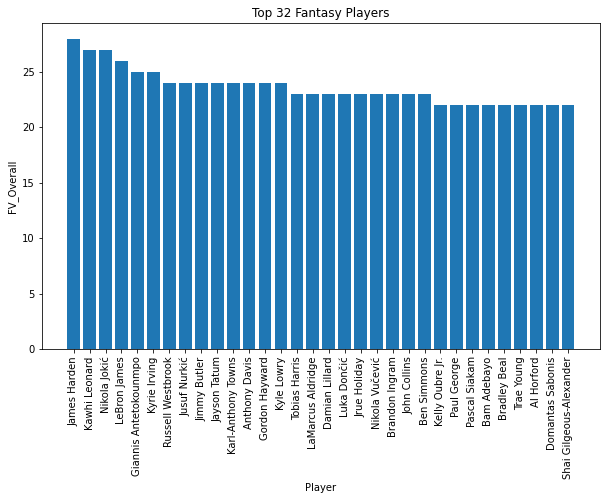

In [77]:
#create bar chart for top 32 fantasy players 
plt.figure(figsize = (10, 6))
plt.xlabel('Player')
plt.ylabel('FV_Overall')
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
plt.title('Top 32 Fantasy Players')
plt.xticks(rotation=90)
plt.bar(x, y)

Text(0.5, 1.0, 'Fantasy Value Histogram')

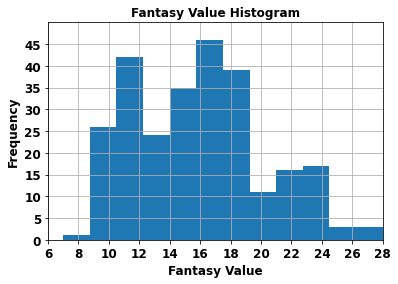

In [78]:
#Histogram of Fantasy Values for the top 263 players
df['FV_Overall'].hist(bins=12, grid=True, xlabelsize=12, ylabelsize=12)
plt.xlabel("Fantasy Value", fontsize=12)
plt.ylabel("Frequency",fontsize=12)
x_ticks = np.arange(0, 30, 2)
plt.xticks(x_ticks)
y_ticks = np.arange(0, 50, 5)
plt.yticks(y_ticks)
plt.ylim((0,50))
plt.xlim((6, 28))
plt.title('Fantasy Value Histogram', fontweight='bold')

### Top 25 Centers

In [79]:
df_c = df[df['Pos']=='C']

In [80]:
df_c.head()

,Player,Pos,Age,G,MP,FG,FGA,FG%,3P,FT,FTA,FT%,REB,AST,STL,BLK,TOV,PTS,DD,TD,DD_per,TD_per,FG_Tier,FG_Pos_Tier,3P_Tier,3P_Pos_Tier,FT_Tier,FT_Pos_Tier,REB_Tier,REB_Pos_Tier,AST_Tier,AST_Pos_Tier,STL_Tier,STL_Pos_Tier,BLK_Tier,BLK_Pos_Tier,TOV_Tier,TOV_Pos_Tier,PTS_Tier,PTS_Pos_Tier,DD_Tier,DD_Pos_Tier,TD_Tier,TD_Pos_Tier,FV_Overall,FV_Position
2,Al Horford,C,33,67,30.20,4.80,10.60,0.45,1.50,0.90,1.20,0.76,6.80,4.00,0.80,0.90,1.20,11.90,6,0,0.09,0.00,2,0,2,3,1,2,3,1,3,3,2,3,3,2,2,2,2,2,2,1,0,0,22,19
4,Alex Len,C,26,55,17.60,3.20,5.80,0.56,0.30,1.20,1.90,0.65,5.80,0.90,0.40,0.90,1.00,8.00,8,0,0.15,0.00,3,2,0,1,0,0,2,1,0,0,0,0,3,2,3,3,0,0,2,1,0,0,13,10
5,Andre Drummond,C,26,57,33.00,7.30,13.80,0.53,0.10,3.00,5.20,0.57,15.20,2.70,1.90,1.60,3.60,17.70,47,0,0.82,0.00,3,2,0,1,0,0,3,3,2,3,3,3,3,3,0,0,3,3,3,3,0,0,20,21
8,Aron Baynes,C,33,42,22.20,4.40,9.10,0.48,1.40,1.30,1.80,0.75,5.60,1.60,0.20,0.50,1.20,11.50,3,0,0.07,0.00,2,1,2,3,1,2,2,0,1,2,0,0,2,0,2,2,1,2,2,1,0,0,15,13
21,Brook Lopez,C,31,68,26.70,4.30,9.90,0.43,1.50,1.90,2.20,0.84,4.60,1.50,0.70,2.40,1.00,12.00,4,0,0.06,0.00,1,0,2,3,2,3,2,0,1,2,1,2,3,3,3,3,2,2,2,0,0,0,19,18


In [81]:
#show top 25 fantasy centers
top_centers = df_c.sort_values('FV_Position', ascending=False).head(25)[['Player', 'Pos', 'FV_Position']]
top_centers

,Player,Pos,FV_Position
129,Joel Embiid,C,24
202,Nikola Jokić,C,24
145,Karl-Anthony Towns,C,24
203,Nikola Vučević,C,23
159,Kristaps Porziņģis,C,22
144,Jusuf Nurkić,C,22
57,Deandre Ayton,C,22
5,Andre Drummond,C,21
131,Jonas Valančiūnas,C,20
244,Thomas Bryant,C,19


### Top 25 Power Forwards

In [82]:
df_pf = df[df['Pos']=='PF']

In [83]:
df_pf.head()

,Player,Pos,Age,G,MP,FG,FGA,FG%,3P,FT,FTA,FT%,REB,AST,STL,BLK,TOV,PTS,DD,TD,DD_per,TD_per,FG_Tier,FG_Pos_Tier,3P_Tier,3P_Pos_Tier,FT_Tier,FT_Pos_Tier,REB_Tier,REB_Pos_Tier,AST_Tier,AST_Pos_Tier,STL_Tier,STL_Pos_Tier,BLK_Tier,BLK_Pos_Tier,TOV_Tier,TOV_Pos_Tier,PTS_Tier,PTS_Pos_Tier,DD_Tier,DD_Pos_Tier,TD_Tier,TD_Pos_Tier,FV_Overall,FV_Position
0,Aaron Gordon,PF,24,62,32.50,5.40,12.40,0.44,1.20,2.40,3.60,0.67,7.70,3.70,0.80,0.60,1.60,14.40,20,1,0.32,0.02,1,0,1,1,0,0,3,3,2,3,2,2,3,2,1,1,2,2,3,3,1,1,19,18
7,Anthony Davis,PF,26,62,34.40,8.90,17.70,0.50,1.20,7.20,8.50,0.85,9.30,3.20,1.50,2.30,2.50,26.10,29,0,0.47,0.00,3,3,1,1,3,3,3,3,2,3,3,3,3,3,0,0,3,3,3,3,0,0,24,25
10,Bam Adebayo,PF,22,72,33.60,6.10,11.00,0.56,0.00,3.70,5.30,0.69,10.20,5.10,1.10,1.30,2.80,15.90,40,3,0.56,0.04,3,3,0,0,0,0,3,3,3,3,3,3,3,3,0,0,2,3,3,3,2,2,22,23
13,Blake Griffin,PF,30,18,28.40,4.90,13.90,0.35,1.50,4.20,5.40,0.78,4.70,3.30,0.40,0.40,2.20,15.50,2,0,0.11,0.00,0,0,2,2,1,1,2,0,2,3,0,0,2,1,0,0,2,3,2,2,0,0,13,12
14,Bobby Portis,PF,24,66,21.10,4.00,8.90,0.45,1.00,1.10,1.40,0.76,5.10,1.50,0.50,0.30,1.10,10.10,5,0,0.08,0.00,2,1,1,1,1,1,2,1,1,1,0,0,1,0,3,3,1,1,2,1,0,0,14,10


In [84]:
#show top 25 fantasy power forwards
top_pf = df_pf.sort_values('FV_Position', ascending=False).head(25)[['Player', 'Pos', 'FV_Position']]
top_pf

,Player,Pos,FV_Position
94,Giannis Antetokounmpo,PF,26
7,Anthony Davis,PF,25
165,LaMarcus Aldridge,PF,24
120,Jayson Tatum,PF,24
210,Pascal Siakam,PF,24
199,Nemanja Bjelica,PF,24
10,Bam Adebayo,PF,23
130,John Collins,PF,23
20,Brandon Ingram,PF,23
72,Domantas Sabonis,PF,22


### Top 25 Fantasy Small Forwards

In [85]:
df_sf = df[df['Pos']=='SF']

In [86]:
df_sf.head()

,Player,Pos,Age,G,MP,FG,FGA,FG%,3P,FT,FTA,FT%,REB,AST,STL,BLK,TOV,PTS,DD,TD,DD_per,TD_per,FG_Tier,FG_Pos_Tier,3P_Tier,3P_Pos_Tier,FT_Tier,FT_Pos_Tier,REB_Tier,REB_Pos_Tier,AST_Tier,AST_Pos_Tier,STL_Tier,STL_Pos_Tier,BLK_Tier,BLK_Pos_Tier,TOV_Tier,TOV_Pos_Tier,PTS_Tier,PTS_Pos_Tier,DD_Tier,DD_Pos_Tier,TD_Tier,TD_Pos_Tier,FV_Overall,FV_Position
3,Alec Burks,SF,28,66,26.60,4.90,11.60,0.42,1.80,3.60,4.00,0.89,4.30,2.90,0.90,0.30,1.40,15.00,1,0,0.02,0.00,0,0,2,2,3,3,1,2,2,3,2,2,1,1,2,1,2,2,1,1,0,0,16,17
6,Andrew Wiggins,SF,24,54,34.40,8.10,18.10,0.45,2.10,3.50,5.00,0.71,5.10,3.70,0.80,1.00,2.40,21.80,4,1,0.07,0.02,1,1,3,3,0,0,2,2,2,3,2,2,3,3,0,0,3,3,2,3,1,1,19,21
11,Ben McLemore,SF,26,71,22.80,3.40,7.70,0.44,2.50,0.70,0.90,0.75,2.20,0.80,0.60,0.20,0.70,10.10,1,0,0.01,0.00,1,1,3,3,1,1,0,0,0,0,1,0,0,0,3,3,1,1,1,1,0,0,11,10
16,Bojan Bogdanović,SF,30,63,33.10,6.60,14.80,0.45,3.00,4.00,4.40,0.90,4.10,2.10,0.50,0.10,2.50,20.20,0,0,0.00,0.00,1,1,3,3,3,3,1,1,2,2,0,0,0,0,0,0,3,3,0,0,0,0,13,13
25,Caleb Martin,SF,24,18,17.60,2.10,4.70,0.44,1.10,0.90,1.20,0.81,2.10,1.30,0.70,0.40,0.80,6.20,0,0,0.00,0.00,1,1,1,1,2,2,0,0,0,0,1,1,2,2,3,3,0,0,0,0,0,0,10,10


In [87]:
#show top 25 fantasy small forwards
top_sf = df_sf.sort_values('FV_Position', ascending=False).head(25)[['Player', 'Pos', 'FV_Position']]
top_sf

,Player,Pos,FV_Position
146,Kawhi Leonard,SF,27
169,LeBron James,SF,26
126,Jimmy Butler,SF,25
259,Will Barton,SF,24
246,Tobias Harris,SF,23
214,Paul George,SF,23
97,Gordon Hayward,SF,23
149,Kelly Oubre Jr.,SF,23
157,Khris Middleton,SF,23
109,Jae Crowder,SF,22


### Top 25 Shooting Guards 

In [88]:
df_sg = df[df['Pos']=='SG']

In [89]:
df_sg.head()

,Player,Pos,Age,G,MP,FG,FGA,FG%,3P,FT,FTA,FT%,REB,AST,STL,BLK,TOV,PTS,DD,TD,DD_per,TD_per,FG_Tier,FG_Pos_Tier,3P_Tier,3P_Pos_Tier,FT_Tier,FT_Pos_Tier,REB_Tier,REB_Pos_Tier,AST_Tier,AST_Pos_Tier,STL_Tier,STL_Pos_Tier,BLK_Tier,BLK_Pos_Tier,TOV_Tier,TOV_Pos_Tier,PTS_Tier,PTS_Pos_Tier,DD_Tier,DD_Pos_Tier,TD_Tier,TD_Pos_Tier,FV_Overall,FV_Position
9,Avery Bradley,SG,29,49,24.20,3.50,7.80,0.44,1.30,0.40,0.50,0.83,2.30,1.30,0.90,0.10,1.00,8.60,0,0,0.00,0.00,1,2,2,1,2,2,0,0,0,0,2,2,0,0,3,3,0,0,0,0,0,0,10,10
15,Bogdan Bogdanović,SG,27,61,29.00,5.50,12.60,0.44,2.70,1.40,1.90,0.74,3.40,3.40,1.00,0.20,1.70,15.10,2,0,0.03,0.00,1,2,3,3,1,0,1,1,2,2,2,2,0,1,1,1,2,2,1,2,0,0,14,16
18,Bradley Beal,SG,26,57,36.00,10.40,22.90,0.46,3.00,6.80,8.00,0.84,4.20,6.10,1.20,0.40,3.40,30.50,8,0,0.14,0.00,2,2,3,3,3,2,1,3,3,3,3,3,2,3,0,0,3,3,2,3,0,0,22,25
23,Bryn Forbes,SG,26,63,25.10,3.80,9.20,0.42,2.30,1.20,1.40,0.83,2.00,1.70,0.50,0.00,0.90,11.20,0,0,0.00,0.00,0,0,3,3,2,2,0,0,1,0,0,0,0,0,3,3,1,1,0,0,0,0,10,9
24,Buddy Hield,SG,27,72,30.80,6.90,16.10,0.43,3.80,1.60,1.90,0.85,4.60,3.00,0.90,0.20,2.30,19.20,2,0,0.03,0.00,0,1,3,3,3,2,2,3,2,2,2,2,0,1,0,0,3,3,1,1,0,0,16,18


In [90]:
#show top 25 fantasy shooting guards
top_sg = df_sg.sort_values('FV_Position', ascending=False).head(25)[['Player', 'Pos', 'FV_Position']]
top_sg

,Player,Pos,FV_Position
113,James Harden,SG,29
18,Bradley Beal,SG,25
261,Zach LaVine,SG,23
230,Shai Gilgeous-Alexander,SG,23
67,Devin Booker,SG,23
179,Marcus Smart,SG,22
119,Jaylen Brown,SG,22
36,CJ McCollum,SG,22
62,DeMar DeRozan,SG,21
89,Fred VanVleet,SG,21


### Top 25 Point Guards

In [91]:
df_pg = df[df['Pos']=='PG']

In [92]:
df_pg.head()

,Player,Pos,Age,G,MP,FG,FGA,FG%,3P,FT,FTA,FT%,REB,AST,STL,BLK,TOV,PTS,DD,TD,DD_per,TD_per,FG_Tier,FG_Pos_Tier,3P_Tier,3P_Pos_Tier,FT_Tier,FT_Pos_Tier,REB_Tier,REB_Pos_Tier,AST_Tier,AST_Pos_Tier,STL_Tier,STL_Pos_Tier,BLK_Tier,BLK_Pos_Tier,TOV_Tier,TOV_Pos_Tier,PTS_Tier,PTS_Pos_Tier,DD_Tier,DD_Pos_Tier,TD_Tier,TD_Pos_Tier,FV_Overall,FV_Position
1,Aaron Holiday,PG,23,66,24.50,3.50,8.50,0.41,1.30,1.10,1.30,0.85,2.40,3.40,0.80,0.20,1.30,9.50,3,0,0.05,0.00,0,0,2,2,3,2,0,0,2,1,2,1,0,1,2,3,1,1,1,1,0,0,13,12
12,Ben Simmons,PG,23,57,35.40,6.60,11.40,0.58,0.00,3.20,5.20,0.62,7.80,8.00,2.10,0.60,3.50,16.40,31,6,0.54,0.11,3,3,0,0,0,0,3,3,3,3,3,3,3,3,0,0,2,2,3,3,3,3,23,23
17,Brad Wanamaker,PG,30,71,19.30,2.30,5.10,0.45,0.50,1.80,1.90,0.93,2.00,2.50,0.90,0.20,1.10,6.90,0,0,0.00,0.00,1,2,0,0,3,3,0,0,2,0,2,1,0,1,3,3,0,0,0,0,0,0,11,10
22,Bruce Brown,PG,23,58,28.20,3.40,7.70,0.44,0.60,1.50,2.10,0.74,4.70,4.00,1.10,0.50,1.70,8.90,4,0,0.07,0.00,1,2,0,0,0,0,2,3,3,1,3,2,2,3,1,2,0,0,2,2,0,0,14,15
34,Chris Paul,PG,34,70,31.50,6.20,12.70,0.49,1.60,3.60,4.00,0.91,5.00,6.70,1.60,0.20,2.30,17.60,10,0,0.14,0.00,2,3,2,2,3,3,2,3,3,2,3,3,0,1,0,1,3,2,2,2,0,0,20,22


In [93]:
#show top 25 fantasy shooting guards
top_pg = df_pg.sort_values('FV_Position', ascending=False).head(25)[['Player', 'Pos', 'FV_Position']]
top_pg

,Player,Pos,FV_Position
164,Kyrie Irving,PG,27
163,Kyle Lowry,PG,25
226,Russell Westbrook,PG,25
45,Damian Lillard,PG,25
172,Luka Dončić,PG,24
12,Ben Simmons,PG,23
139,Jrue Holiday,PG,23
250,Trae Young,PG,22
34,Chris Paul,PG,22
235,Stephen Curry,PG,22


### Create Excel File from DataFrame

In [176]:
df.to_excel("Fantasy_Basketball_Draft_Guide_20-21.xlsx") 